<a href="https://colab.research.google.com/github/rafaemac/Projetos-Data-Science/blob/main/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [Rafael Machado de Almeida](https://www.linkedin.com/in/rafael-machado-de-almeida-a47ab7182/)*  

---
  

# Panorama do COVID-19

Desde 2019, o mundo vem sofrendo com a presença do Coronavírus, virus este responsável pelo COVID-19.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é que não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

A análise a seguir busca entender um pouco mais os dados sobre o comportamento da doença ao longo do tempo.

## Obtenção dos Dados

Os dados deste *dataset* foram obtidos da página [Our World in Data](https://github.com/owid/covid-19-data/tree/master/public/data). Este conjunto de dados é atualizado diariamente, e suas fontes podem ser encontradas [aqui](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).

Apesar destes dados serem provenientes de fontes confiáveis, algumas observações devem ser feitas aqui: sempre que tratamos de doenças relativamente novas (como é o caso do Covid-19), é bastante comum encontrarmos divergências entre os dados oficiais, os não-oficiais e os governamentais.

No caso do Covid, essa dificuldade é ainda maior pelo fato de a doença apresentar sintomas muito comuns a gripes e resfriados comuns.

## Dicionário de Variáveis

O *Dataset* em questão possui 67 variáveis, mas focaremos nossa análise apenas nas variáveis listadas abaixo:

`iso code` - código usado para identificar o país;

`continent` - continente; 

`location` - país;

`date` - data;

`total_cases` - número total de casos;

`new_cases` - novos casos;

`total_deaths` - total de mortes;

`new_deaths` - novas mortes;

`total_cases_per_million` - número de casos/milhão de habitantes;

`new_cases_per_million` - novos casos/milhão de habitantes;

`total_deaths_per_million` - número total de mortes/milhão de habitantes;

`new_deaths_per_million` - novas mortes/milhão de habitantes;

`reproduction rate` - taxa de reprodução do vírus;

`icu_patients` - número de pacientes internados em UTI;

`hosp_patients` - número de pacientes no hospital, em determinado dia;

`total_tests` - número total de testes realizados;

`positive_rate` - taxa de testes positivados;

`total_vaccinations` - total de vacinas administradas;

`people_vaccinated` - número de pessoas vacinadas;

`people_fully_vaccinated` - número de pessoas que tomaram todas as doses da vacina;

`total_boosters` - número de doses de vacinação tomadas além do recomendado;

`population` - população do país;

`median_age` - idade média da população;

`aged_65_older` - parcela da população com 65 anos ou mais;

`aged_70_older` - parcela da população com 70 anos ou mais;

`gdp_per_capita` - PIB *per capita*;

`extreme_poverty` - parcela da população vivendo em extrema pobreza;

`cardiovasc_death_rate` - taxa de morte por doenças cardiovasculares;

`diabetes_prevalence` - percentual da população com diabetes;

`female_smokers` - parcela de mulheres fumantes;

`male_smokers` - parcela de homens fumantes;

`handwashing_facilities` - parcela da população com acesso a saneamento básico;

`life_expectancy` - expectativa de vida;

`human_development_index` - Índice de Desenvolvimento Humano;


*A descrição do nome de todas as colunas pode ser encontrada  [neste link](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).*

### Importando os dados do COVID-19

Na sequência, vamos importar as bibliotecas necessárias para a análise (pandas, matplotlib e seaborn) e importar também o [*DataSet*](https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv).


In [2]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# importar o dataset COVID-19 para um DataFrame e convertendo o formato das datas
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df.date = pd.to_datetime(df.date, format='%Y-%m-%d');

##Conhecendo o inimigo (ou amigo)

No primeiro contato com o arquivo, alguns passos sempre serão recomendados: descobrir as dimensões do arquivo (quantidade de linhas e colunas), descobrir as variáveis e o tipo das variáveis (números inteiros, textos...) e dar uma olhada básica para os primeiros valores da tabela.

In [3]:
#Descobrindo as dimensões do DataSet
df.shape
print('Dimensões do Dataset',
    '\nVariáveis:',df.shape[1],
    '\nLinhas:',df.shape[0])

Dimensões do Dataset 
Variáveis: 67 
Linhas: 194977


Outro ponto importante que precisamos saber é nosso intervalo de tempo, ou seja, em que dia os dados começaram a ser monitorados.
Os dados são atualizados diariamente, então, caso você deseje utilizar este mesmo Dataset no futuro, verá que as dimensões mostradas acima não serão mais as mesmas.

In [5]:
#Descobrindo a data de início do monitoramento
df.date.min()
print('Os dados começaram a ser montirados em {}'.format(df.date.min()))

Os dados começaram a ser montirados em 2020-01-01 00:00:00


In [6]:
#Primeiro contato com o DataSet
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [7]:
#Verificando o tipo das variáveis
df.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
human_development_index                           float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

In [8]:
#Descobrindo a quantidade de valores nulos de uma variável
round((df.isnull().sum()/df.shape[0]).sort_values(ascending=False),2)

weekly_icu_admissions                      0.97
weekly_icu_admissions_per_million          0.97
excess_mortality_cumulative_absolute       0.97
excess_mortality_cumulative_per_million    0.97
excess_mortality_cumulative                0.97
                                           ... 
total_cases                                0.04
population                                 0.01
date                                       0.00
location                                   0.00
iso_code                                   0.00
Length: 67, dtype: float64

##Valores faltantes...

Agora que já tivemos um primeiro contato com os dados, algumas coisas devem ser esclarecidas. A primeira delas é: percebemos que boa parte dos dados estão ausentes em algumas variáveis. Qual o motivo disto?

Podemos olhar, por exemplo, para a variável continente: sabemos que os dados de maio de 2022 já estão contabilizados, então podemos, a título de curiosidade, olhar os 5 países com mais mortes por Covid até então.



In [9]:
df.loc[df.date=='2022-05-31'].sort_values(by="total_deaths",ascending=False)[0:5]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
192514,OWID_WRL,NaN,World,2022-05-31,529631448.0,622529.0,472303.857,6292566.0,1537.0,1453.429,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
186246,OWID_UMC,NaN,Upper middle income,2022-05-31,129289264.0,66462.0,58635.000,2522165.0,397.0,335.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77169,OWID_HIC,NaN,High income,2022-05-31,307653375.0,547630.0,406859.429,2417163.0,1101.0,1078.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57321,OWID_EUR,NaN,Europe,2022-05-31,198483269.0,194958.0,129149.286,1843349.0,605.0,541.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129524,OWID_NAM,NaN,North America,2022-05-31,99544456.0,181078.0,112586.000,1447690.0,426.0,433.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Com uma rápida passada de olho, podemos perceber um padrão: sempre que os dados se referirem a uma região do mundo (a América do Norte, por exemplo), o valor de continente será nulo. Seria um erro, por exemplo, deletar estas linhas apenas pelo fator de terem um valor nulo.

Outro fator a ser considerado: quando a pandemia começou, o número de variáveis monitoradas era muito menor do que o atual. Assim sendo, muitas variáveis começaram a ser preenchidas meses após (ou até anos) os primeiros registros.



##Hora de colocar a mão na massa

Agora que já sabemos com quem estamos lidando, vamos à obra!

Como foi dito anteriormente, apenas algumas das variáveis disponíveis serão analisadas aqui. Com estas variáveis em mãos, iremos responder às seguintes perguntas:

- Quais países lideram o número de casos de Covid?
- Quais países tiveram mais mortes?
- Quais países lideram em número de novos casos em 05/2022?
- Quais países lideram o número de casos de Covid/milhão de habitantes?
- Quais países tiveram mais mortes/milhão de habitantes?
- Quais os países com maior número de vacinados?
- Quais os países em que a taxa de reprodução do vírus foi maior?

#*And the Oscar goes to...*

Sim, este é o momento onde campeões são revelados! Claro que esta não é uma lista onde os primeiros colocados deveriam se orgulhar, mas vamos ao dados:

## **Países com maior (e menor) número de casos**
Como foi comentado anteriormente, algumas variáveis deste conjunto de dados são utilizadas para agrupar países ou regiões do planeta. Por exemplo, se filtrarmos pelos maiores valores em número de casos, não encontraremos o nome de nenhum país entre os 5 primeiros. Ao invés disso, encontraremos *World* (Mundo), *High Income* (Renda Alta), *Europe* (Europa), *Asia*(Ásia) e *European Union*(União Europeia).
Vocês poderam observar que, em boa parte dos gráficos, foi necessário limpar estes valores que representam os números de determinadas regiões.

Olhando apenas para Países, os líderes(e os lanternas) em número de casos são:

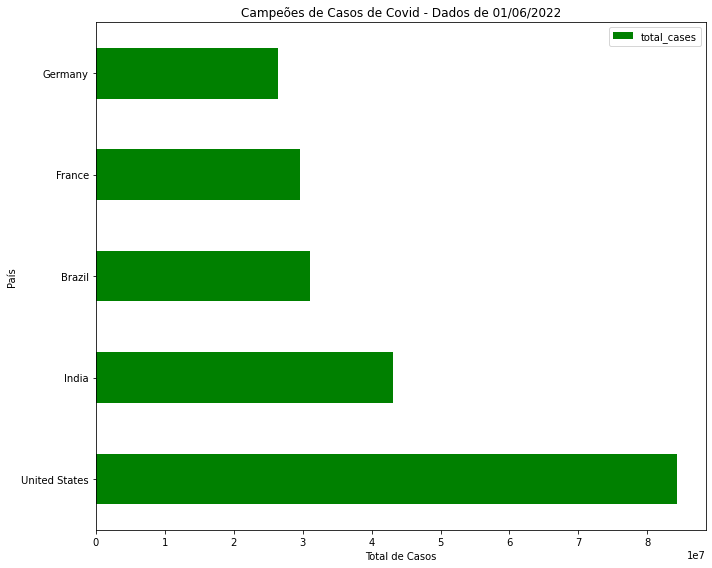

In [43]:
#Países com maior número de casos em 01/06/2022
top_5_total_cases = df.loc[df.date == '2022-05-31', ['location', 'total_cases']].reset_index(drop=True).sort_values(by="total_cases", ascending=False)[8:14]
#Eliminando linhas ligadas a regiões do mundo que estejam no intervalo do gráfico
top_5_total_cases.drop(index = 196, axis = 0, inplace=True)
#Criando o gráfico
fig,ax = plt.subplots(figsize=(10,8))

top_5_total_cases.plot(x="location", y="total_cases", kind="barh", color='green', ax=ax)
ax.set_title("Campeões de Casos de Covid - Dados de 01/06/2022")
ax.set_xlabel("Total de Casos")
ax.set_ylabel("País")


plt.tight_layout()

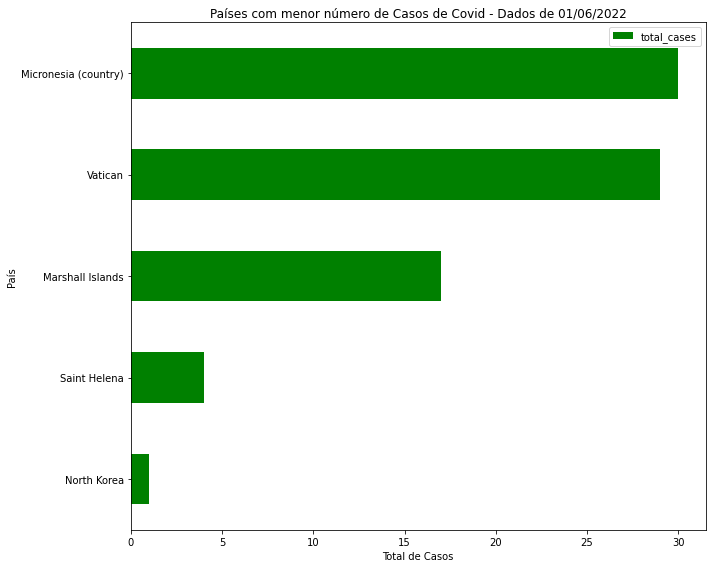

In [44]:
#Países com menor número de casos em 01/06/2022
sub_5_total_cases = df.loc[df.date == '2022-05-31', ['location', 'total_cases']].reset_index(drop=True).sort_values(by="total_cases", ascending=True)[0:5]
#Criando o gráfico
fig,ax = plt.subplots(figsize=(10,8))

sub_5_total_cases.plot(x="location", y="total_cases", kind="barh", color='green', ax=ax)
ax.set_title("Países com menor número de Casos de Covid - Dados de 01/06/2022")
ax.set_xlabel("Total de Casos")
ax.set_ylabel("País")

plt.tight_layout()

Analisando os dois gráficos acima, temos algumas surpresas... A primeira é que a China - país mais populoso do mundo - não aparece entre os primeiros colocados em número de casos. Sabemos que a fidedignidade das informações sobre a China pode ser colocada em xeque facilmente, mas também ouvimos diversas notícias sobre o *lockdown* realizado lá.

Entre os países que apresentam menor número de casos, a Coréia de Norte apresenta o incrível número de 1 caso apenas! Sim, você leu certo. Apesar do ferrenho cerco sofrido pela população coreana, com severas restrições a entradas e saídas do país, dificilmente alguém acreditará que este dado corresponde à realidade. Mas, para fins estatísticos, esta é a única informação que temos.

O restante dos países na lista possue um número extremamente baixo de habitantes, o que justifica o pequeno número de casos.

## **Países com maior número de mortes**

Seguindo a lista, vamos para agora para o número de mortes.

Até o momento (dados retirados até a data de 01/06/2022), temos cerca de 6,3 milhões de mortes atribuídas ao COVID 19 ao redor do mundo.

Text(0, 0.5, 'Total de Mortes')

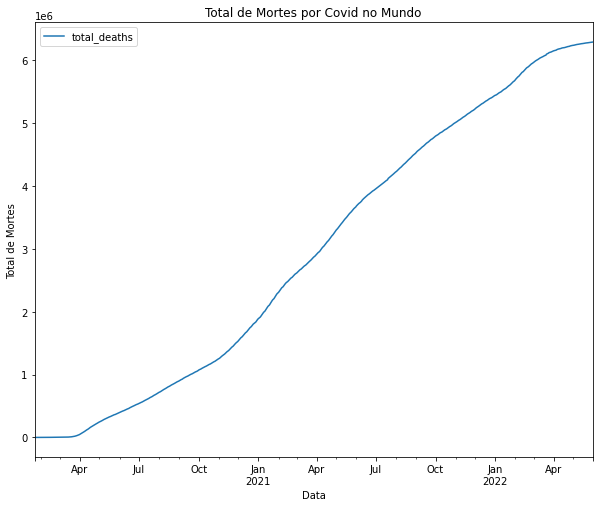

In [12]:
#Número de mortes no mundo
world_death = df.loc[(df.location == "World")&(df.date<'2022-06-01'),["total_deaths","date"]].reset_index(drop=True)
#Criando o gráfico
fig,ax = plt.subplots(figsize=(10,8))

world_death.plot(x="date", y="total_deaths", ax=ax)
ax.set_title("Total de Mortes por Covid no Mundo")
ax.set_xlabel("Data")
ax.set_ylabel("Total de Mortes")

Podemos ver que, a partir de abril de 2020, o número de mortes se manteve numa constante. No final do mesmo ano, a escalada de mortes começou a se acentuar. Esse ritmo só começou a diminuir de julho de 2021 para frente.

Atualmente, o avanço das mortes por Covid parece ter diminuído significativamente, apesar da nova onda de casos que vem sendo divulgada.
Para fins informativos, as primeiras vacinas contra a doença começaram a ser realizadas em dezembro de 2020.

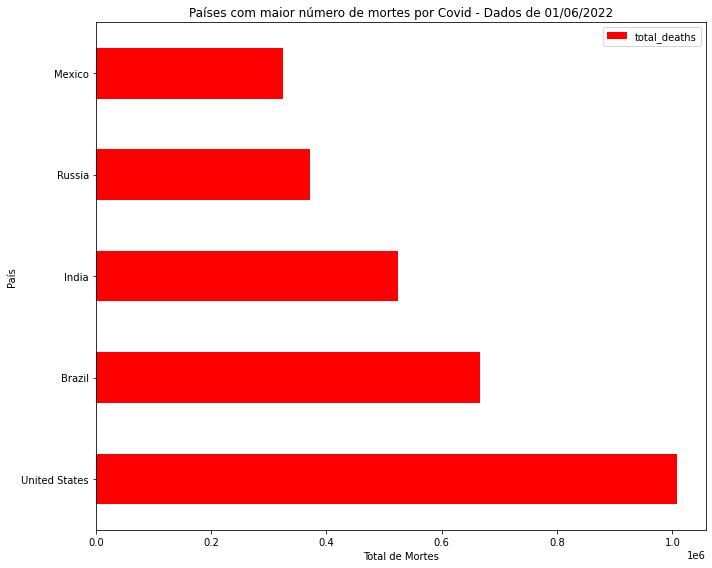

In [47]:
#Número de mortes por país
top_5_total_deaths = df.loc[df.date == '2022-05-31', ['location', 'total_deaths']].reset_index(drop=True).sort_values(by="total_deaths", ascending=False)[9:14]
#Criando o gráfico
fig,ax = plt.subplots(figsize=(10,8))

top_5_total_deaths.plot(x="location", y="total_deaths", kind="barh", color='red', ax=ax)
ax.set_title("Países com maior número de mortes por Covid - Dados de 01/06/2022")
ax.set_xlabel("Total de Mortes")
ax.set_ylabel("País")

plt.tight_layout()

Entre os campeões de mortes, os Estados Unidos seguem liderando, mas são seguidos pelo Brasil, e não pela Índia (que é segunda em número de casos). França e Alemanha, que estavam no Top 5 de casos, não aparecem entre os líderes em mortes.

Uma boa explicação para isso é que as vacinações contra a COVID tiveram grande adesão em terras europeias. Outra curiosidade é que a primeira vacina foi administrada na Inglaterra.

##Novos Casos
Sabemos que o número de casos - e de mortes - por COVID 19 vêm diminuindo com o passar do tempo, e o gráfico abaixo reforça esse ponto.
Podemos ver que, em comparação com o início do ano, o número de casos diminuiu significativamente.

Ainda não temos uma curva totalmente estável, mas vemos essa tendência de diminuição de casos acontecendo.


Text(0, 0.5, 'Total de Novos Casos')

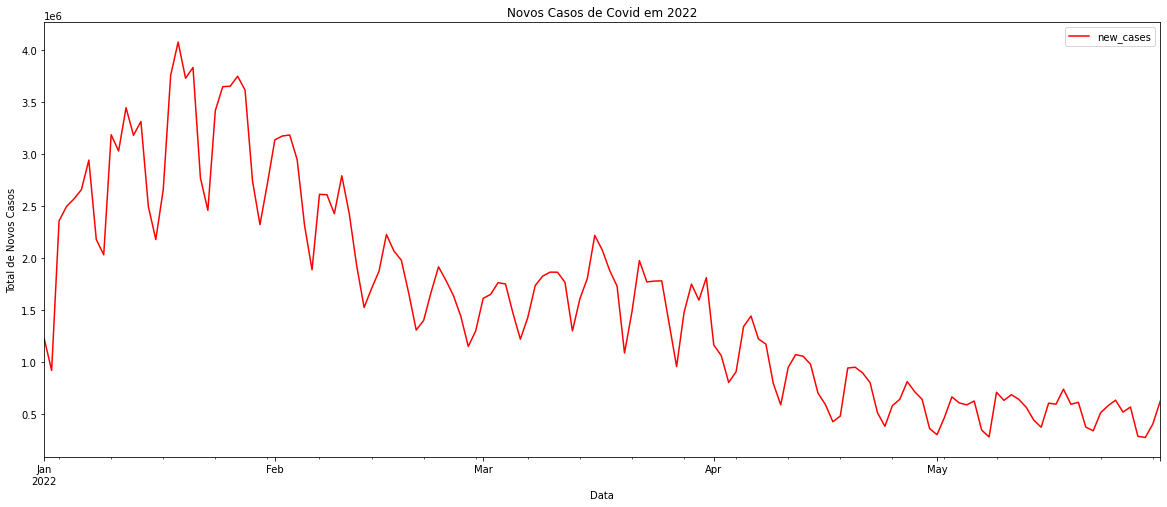

In [14]:
#Número de Novos Casos no Mundo
new_cases_2022 = df.loc[(df.date>'2021-12-31') & (df.date<'2022-06-01') & (df.location == "World"), ['new_cases','date']]
#Criando o gráfico
fig, ax = plt.subplots(figsize=(20,8))

new_cases_2022.plot(x='date', y='new_cases',ax=ax, color='red')

ax.set_title("Novos Casos de Covid em 2022")
ax.set_xlabel("Data")
ax.set_ylabel("Total de Novos Casos")

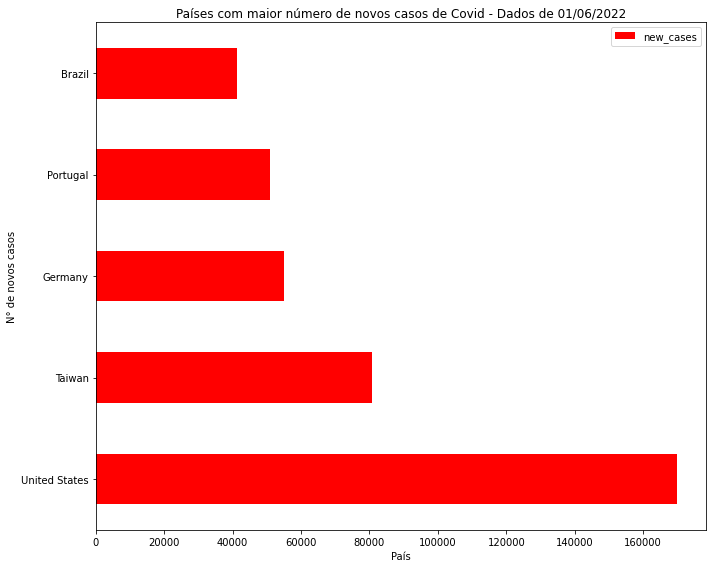

In [50]:
#Número de Novos Casos em 2022 por País até 01/06/22 - Top 5
top_5_new_cases22 = df.loc[df.date == '2022-05-31', ['location', 'new_cases']].reset_index(drop=True).sort_values(by="new_cases", ascending=False)[0:14]
#Removendo valores que não dizem respeito a países
top_5_new_cases22.drop(index=[231,92,68,155,69,11,223,196,159], axis = 0, inplace=True)
#Criando o gráfico
fig,ax = plt.subplots(figsize=(10,8))

top_5_new_cases22.plot(x="location", y="new_cases", kind="barh", color='red', ax=ax)
ax.set_title("Países com maior número de novos casos de Covid - Dados de 01/06/2022")
ax.set_xlabel("País")
ax.set_ylabel("N° de novos casos")

plt.tight_layout()

Quando olhamos o número de novos casos por país, temos algumas surpresas...
Já esperávamos a presença dos EUA entre os 5 primeiros (pelo fator população, principalmente), mas 2 países - com exceção do Brasil e da Alemanha -  acabam sendo uma surpresa.

Taiwan, província chinesa com seus 23 milhões de habitantes, aparece em segundo lugar.

Portugal, com seus 10 milhões de habitantes, aparece na quarta colocação.

## Número de mortes/milhão de habitantes

Na sequência, temos dois dos parâmetros mais signficativos para avaliar o impacto da pandemia em um país: o número de mortes/ milhão de habitantes e o número de casos/milhão de habitantes.

Você deve ter visto nos gráficos anteriores que, em números absolutos, países como Brasil e Estados Unidos geralmente aparecem liderando em números de casos e mortes. Isso se deve principalmente ao fato de que as populações de ambos os países - e de outros, como Índia e Rússia, por exemplo - é grande.

Com os dois indicadores que veremos a seguir, o fator população acaba sendo anulado, e temos a noção real da parcela da população que acaba sendo afetada pelo vírus.

Como a diferença entre os primeiros da lista era razoavelmente pequena, para estes 2 indicadores resolvi plotar os 15 primeiros.



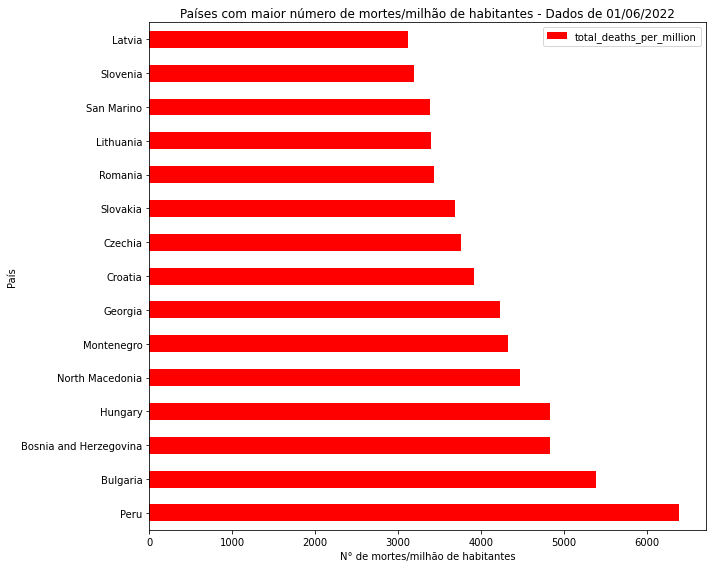

In [51]:
#Top 15 países com maior número de mortes/milhão de habitantes até 01/06/2022
top_15_deaths_mi = df.loc[df.date == '2022-05-31', ['location', 'total_deaths_per_million']].reset_index(drop=True).sort_values(by="total_deaths_per_million", ascending=False)[0:15]

#Criando o gráfico
fig,ax = plt.subplots(figsize=(10,8))

top_15_deaths_mi.plot(x="location", y="total_deaths_per_million", kind="barh", color='red', ax=ax)
ax.set_title("Países com maior número de mortes/milhão de habitantes - Dados de 01/06/2022")
ax.set_xlabel("N° de mortes/milhão de habitantes")
ax.set_ylabel("País")

plt.tight_layout()

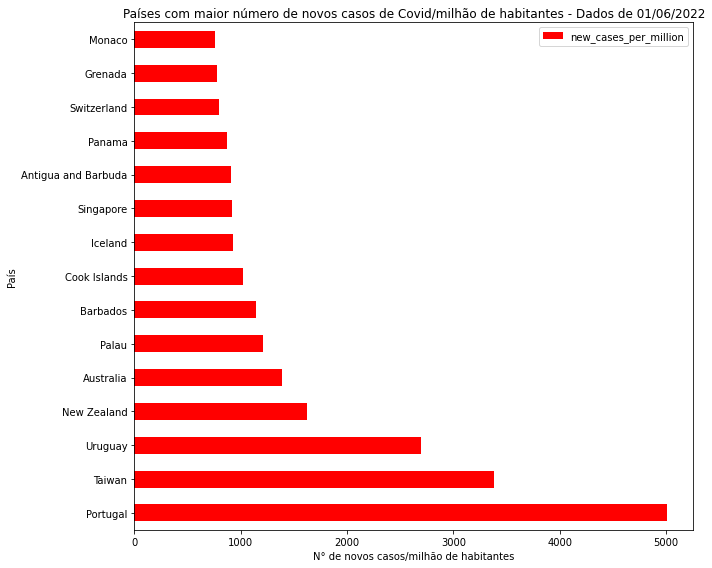

In [54]:
#Países com maior número de casos/milhão de habitantes
top_15_cases_mi = df.loc[df.date == '2022-05-31', ['location', 'new_cases_per_million']].reset_index(drop=True).sort_values(by="new_cases_per_million", ascending=False)[0:16]
#Removendo o valor que não correspondia a um país
top_15_cases_mi.drop(index=159, axis = 0, inplace=True);

#Criando o gráfico
fig,ax = plt.subplots(figsize=(10,8))

top_15_cases_mi.plot(x="location", y="new_cases_per_million", kind="barh", color='red', ax=ax)
ax.set_title("Países com maior número de novos casos de Covid/milhão de habitantes - Dados de 01/06/2022")
ax.set_xlabel("N° de novos casos/milhão de habitantes")
ax.set_ylabel("País")


plt.tight_layout()

Aqui vemos que os campeões são outros. Peru, Bulgária, Bósnia, Hungria e Macedônia do Norte puxam a fila quando o assunto é número de mortes por milhão de habitantes. Vale ressaltar que, neste quesito, o Peru parece estar longe do segundo colocado.

Em número de casos, Portugal despacha a concorrência com folga, justificando a presença no top 5 de países com maior número de casos de COVID. Logo na sequência, Taiwan, Uruguai, Nova Zelândia e Austrália completam a lista dos 5 países com maior número de casos por milhão de habitantes.

##Vamos falar de coisa boa?

Depois de tanta tragédia, chegou a hora de olharmos para alguns dados que devem nos trazer bons agouros: os números da vacinação.

Na sequência, teremos 4 gráficos: o primeiro sobre o total de pessoas vacinadas no mundo; o segundo, sobre o total de pessoas completamente vacinadas, ou seja, que tomaram todas as doses recomendadas; o terceiro e o quarto gráficos mostram como os dois primeiros gráficos se distribuem quando olhamos a situação dos países.

Text(0, 0.5, 'Número de Pessoas')

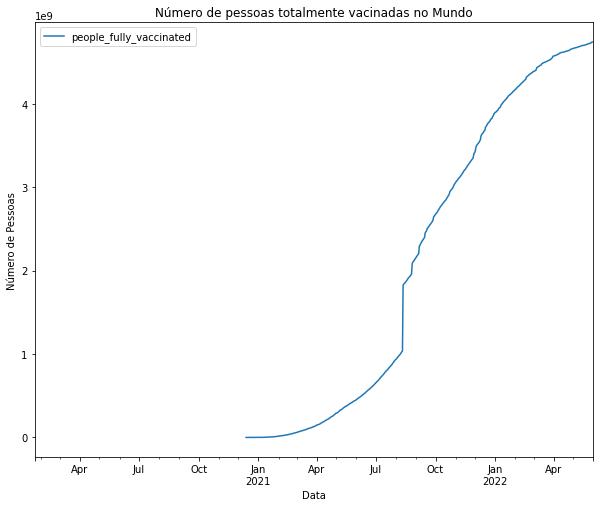

In [59]:
#Número de pessoas completamente vacinadas - Dados retirados em 01/06/22
vaccination = df.loc[(df.location == "World")&(df.date<'2022-06-01'),["people_fully_vaccinated","date"]].reset_index(drop=True)
#Criando o gráfico
fig,ax = plt.subplots(figsize=(10,8))

vaccination.plot(x="date", y="people_fully_vaccinated", ax=ax)
ax.set_title("Número de pessoas totalmente vacinadas no Mundo")
ax.set_xlabel("Data")
ax.set_ylabel("Número de Pessoas")

Text(0, 0.5, 'Número de pessoas')

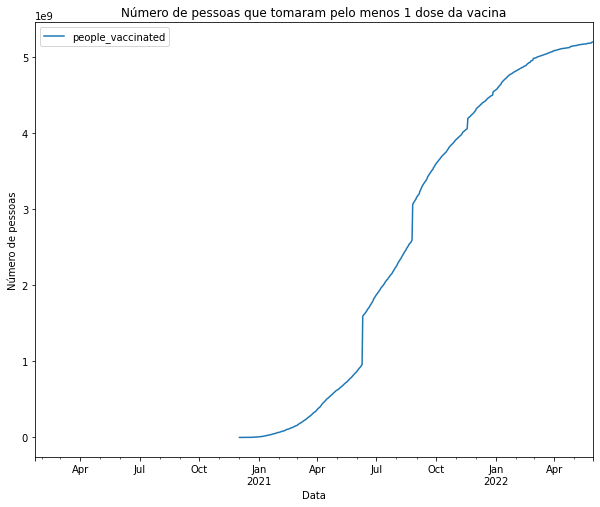

In [57]:
#Pessoas que tomaram pelo menos 1 dose da vacina -  Dados retirados em 01/06/22
vaccination_1dose = df.loc[(df.location == "World")&(df.date<'2022-06-01'),["people_vaccinated","date"]].reset_index(drop=True)
#Criando o gráfico
fig,ax = plt.subplots(figsize=(10,8))

vaccination_1dose.plot(x="date", y="people_vaccinated", ax=ax)
ax.set_title("Número de pessoas que tomaram pelo menos 1 dose da vacina")
ax.set_xlabel("Data")
ax.set_ylabel("Número de pessoas")

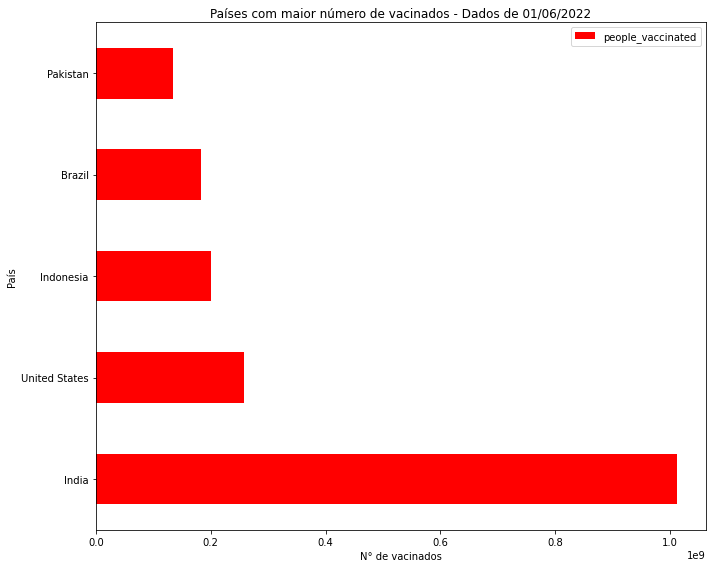

In [61]:
#Países com maior número de vacinados
top_5_vaccinated = df.loc[df.date == '2022-05-31', ['location', 'people_vaccinated']].reset_index(drop=True).sort_values(by="people_vaccinated", ascending=False)[0:15]
#Removendo os valores que não são relativos a países
top_5_vaccinated.drop(index=[231,92,68,155,69,11,223,196,125,1], axis = 0, inplace=True)
#Criando o gráfico
fig,ax = plt.subplots(figsize=(10,8))

top_5_vaccinated.plot(x="location", y="people_vaccinated", kind="barh", color='red', ax=ax)
ax.set_title("Países com maior número de vacinados - Dados de 01/06/2022")
ax.set_xlabel("N° de vacinados")
ax.set_ylabel("País")

plt.tight_layout()

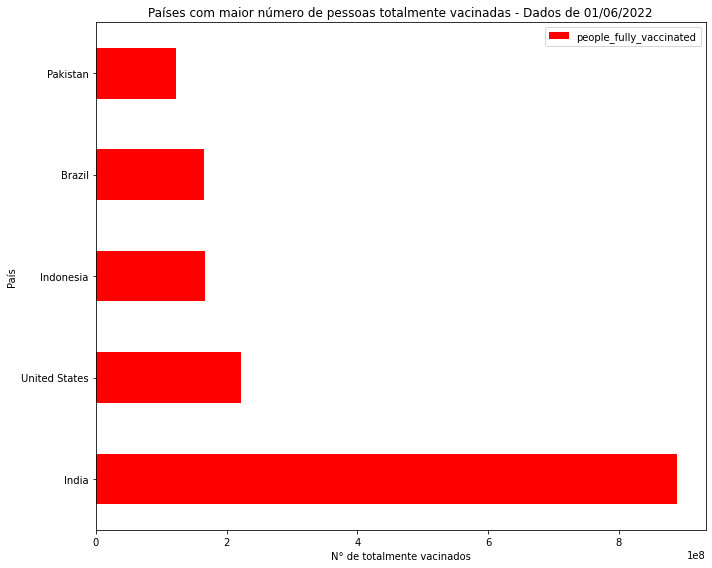

In [63]:
#Países com maior número de pessoas totalmente vacinadas
top_5_fully_vaccinated = df.loc[df.date == '2022-05-31', 
                                ['location', 'people_fully_vaccinated']].reset_index(drop=True).sort_values(by="people_fully_vaccinated", ascending=False)[0:15]
#Removendo os valores que não são relativos a países
top_5_fully_vaccinated.drop(index=[231,92,68,155,69,11,223,196,125,1], axis = 0, inplace=True)
#Criando o gráfico
fig,ax = plt.subplots(figsize=(10,8))

top_5_fully_vaccinated.plot(x="location", y="people_fully_vaccinated", kind="barh", color='red', ax=ax)
ax.set_title("Países com maior número de pessoas totalmente vacinadas - Dados de 01/06/2022")
ax.set_xlabel("N° de totalmente vacinados")
ax.set_ylabel("País")

plt.tight_layout()

Dos gráficos acima, podemos tirar algumas informações: o número de pessoas que tomaram pelo menos 1 dose da vacina chegou a 519 milhões em junho de 2022, enquanto o número de pessoas totalmente vacinadas chegou a 473 milhões - ou seja, cerca de 91% das pessoas que se vacinaram tomaram todas as doses necessárias.

Com relação aos países, nenhuma surpresa. Todos os 5 países que aparecem nos dois gráficos estão entre os mais populosos do mundo, justificando a enorme quantidade de vacinas administradas.

##Taxa de reprodução do vírus

Agora, vamos adentrar nos campeões de taxa de reprodução do vírus. 

A taxa de reprodução, como o próprio nome sugere, mostra a velocidade com que o vírus se espalha. Uma taxa de reprodução igual a 1 significa que cada pessoa que contrai o vírus o transmite a uma outra pessoa. Se a taxa for 2, significa que cada infectado transmitirá o vírus para outras 2 pessoas.

Neste caso, como as diferenças entre os primeiros colocados eram pequenas, resolvi mostrar os 15 primeiros.

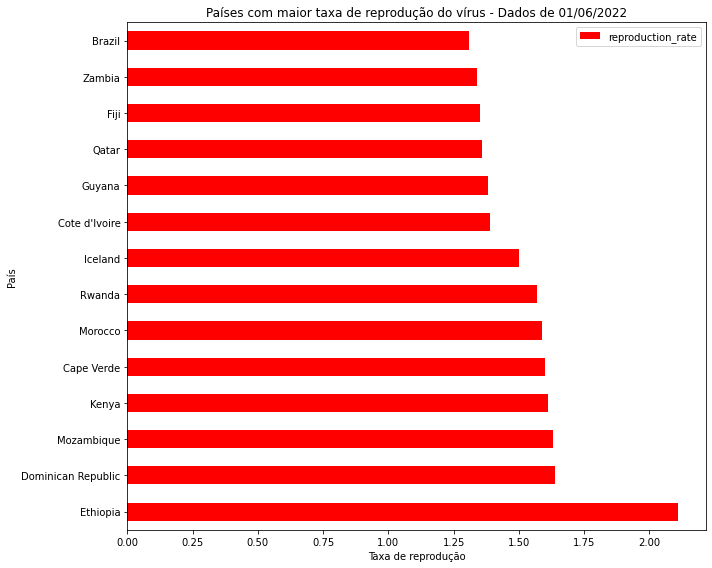

In [66]:
#Países com maior taxa de reprodução do vírus
top_15_reproduction_rate = df.loc[df.date == '2022-05-31', ['location', 'reproduction_rate']].reset_index(drop=True).sort_values(by="reproduction_rate", ascending=False)[0:14]

#Criando o gráfico
fig,ax = plt.subplots(figsize=(10,8))

top_15_reproduction_rate.plot(x="location", y="reproduction_rate", kind="barh", color='red', ax=ax)
ax.set_title("Países com maior taxa de reprodução do vírus - Dados de 01/06/2022")
ax.set_xlabel("Taxa de reprodução")
ax.set_ylabel("País")

plt.tight_layout()

Para fins de classificação, a taxa de reprodução - comumente chamada de Índice R - é classificada da seguinte forma:

R > 1: Epidemia, pois o número de casos da doença está aumentando.

R = 1: Endemia, cada infectado causa uma nova infecção.

R < 1: cada vez menos indivíduos se infectam e o número dos contágios diminui.

Se pegarmos os dados relativos ao cenário mundial, na data atual (01/06/2022) o índice R corresponde a 0.97, ou seja, temos um cenário onde o número de infectados decresce a cada dia.

##BRASIL##

Vamos agora voltar nossos olhos para o Brasil. Na sequência, veremos como estão os números de mortes e casos em terras tupiniquins.

In [23]:
#Analisando os dados brasileiros

df_brasil = df.loc[df.location =="Brazil"].copy()

df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
24349,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
24350,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
24351,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
24352,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25,32.943066
24353,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


In [27]:
# Identificar quando foi registrada a primeira morte no Brasil
df_brasil.loc[df_brasil['total_deaths'] > 0.0].head(1)
print('A primeira morte no Brasil foi registrada em {}'.format(df_brasil.date.loc[24369]))

A primeira morte no Brasil foi registrada em 2020-03-17 00:00:00


In [29]:
df_brasil.loc[df_brasil['new_cases'] > 0.0].head(1)
print('O primeiro caso no Brasil foi registrado em {}'.format(df_brasil.date.loc[24349]))

O primeiro caso no Brasil foi registrado em 2020-02-26 00:00:00


In [30]:
from datetime import date
delta = df_brasil.date.loc[24369] - df_brasil.date.loc[24349]
print('Se passaram {} dias entre o primeiro caso e a primeira morte no Brasil.'.format(delta.days))

Se passaram 20 dias entre o primeiro caso e a primeira morte no Brasil.


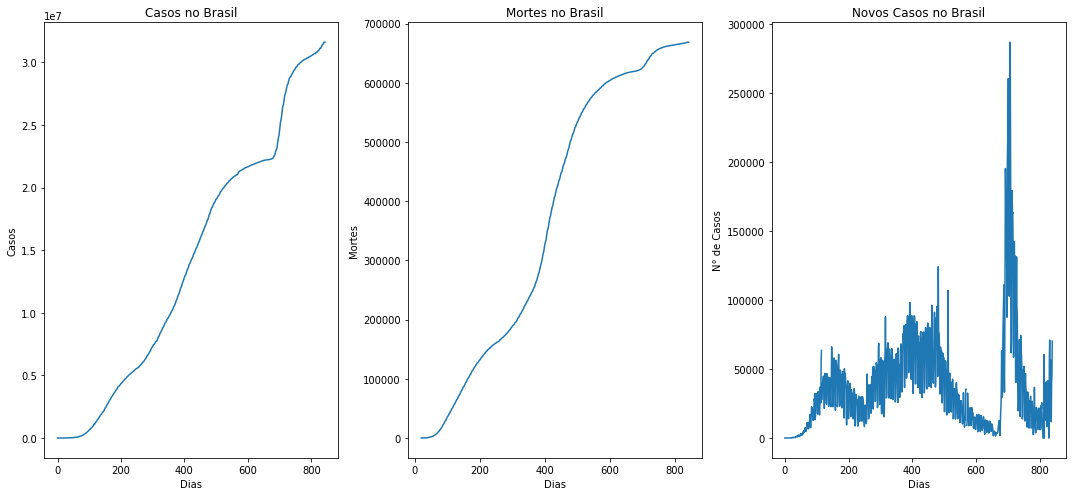

In [76]:
# Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.
x = list(range(844))
z = df_brasil['total_cases']
z2 = df_brasil['total_deaths']
z3 = df_brasil['new_cases']

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x, z)

ax2.set_title('Mortes no Brasil')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Mortes')
ax2.plot(x, z2)

ax3.set_title('Novos Casos no Brasil')
ax3.set_xlabel('Dias')
ax3.set_ylabel('N° de Casos')
ax3.plot(x, z3)
plt.tight_layout()

20 dias se passaram entre o primeiro caso e a primeira morte no Brasil. Conforme os registros, no dia 26/02/2020 tivemos o primeiro caso confirmado de Covid 19 no Brasil, enquanto a primeira morte foi registrada em 17 de março do mesmo ano.

Nos últimos dias, um leve aumento no número de casos tem sido percebido, conforme podemos ver nos gráficos 1 e 3 - este aumento tem sido bastante ventilado na mídia.

Com relação ao número total de mortes, podemos ver que a curva tem se achatado, o que significa que o aumento do número de mortes tem sido menor do que em outras épocas.

##Conclusão

Após esta breve análise do *dataset*, conseguimos tirar algumas conclusões gerais sobre o COVID 19:
- A maioria das pessoas (mais de 90%) que tomaram pelo menos uma dose da vacina resolveu seguir os procedimentos recomendados, e está completamente vacinada;
- Quase 500 milhões de pessoas ao redor do mundo estão completamente vacinadas;
- Os Estados Unidos é líder disparado quando o assunto são casos da doença, porém, se levarmos em conta o tamanho da população do país, não aparece entre os líderes em morte e em casos;
- O Brasil encontra-se entre os países com maior número de vacinados, mas também está presente entre os países com maior taxa de reprodução do vírus;
- Atualmente, a taxa de reprodução do vírus é menor do que 1, o que significa que o número de infectados vem diminuindo gradualmente;